Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 317607744.0000
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 317519232.0000
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 317340192.0000
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 317000320.0000
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 316394240.0000
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 315418688.0000
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 313916864.0000
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 311812448.0000
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 308956992.0000
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 305304352.0000
Epoch 11/100
34/34 [==============================] - 0s 2ms/step - loss: 300608640.0000
Epoch 12/100
34/34 [==========

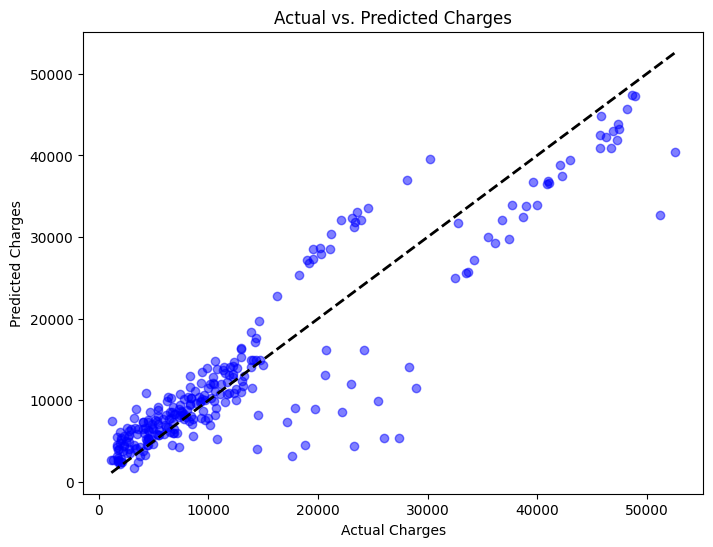

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("insurance.csv")

# Perform one-hot encoding for categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Split data into features and target variable
X = df.drop(columns=['charges'])
y = df['charges']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Build the ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', loss)

y_pred = model.predict(X_test).flatten()
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()
